In [9]:
import pandas as pd
import warnings
from tqdm.notebook import tqdm
tqdm.pandas()

In [11]:
df = pd.DataFrame(pd.read_csv('../data/labelled_corpus.csv'))
df.head()

,date,stemmed_text,label,text_frequency
0,2014-07-14 03:35:09,"['deep', 'thought', 'underdog', 'start', '99',...",0.0,8
1,2014-09-13 00:31:19,"['post', 'come', 'human', 'moral', 'joke', 'lo...",0.0,11
2,2014-11-20 04:31:58,"['rebirth', 'guy', 'charg', 'thegood', 'ofc', ...",0.0,11
3,2014-11-20 19:38:05,"['water', 'slip', 'finger', 'hold', 'ship', 'm...",0.0,7
4,2014-11-22 19:17:39,"['limit', 'knowledg', 'power', 'human', 'perso...",0.0,7


In [16]:
df.loc[3587012]

date                                      2023-02-09 22:37:56+00:00
stemmed_text      ['erika', 'iocdf', 'grassroot', 'advoc', 'love...
label                                                           0.0
text_frequency                                                   19
Name: 3587012, dtype: object

In [17]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

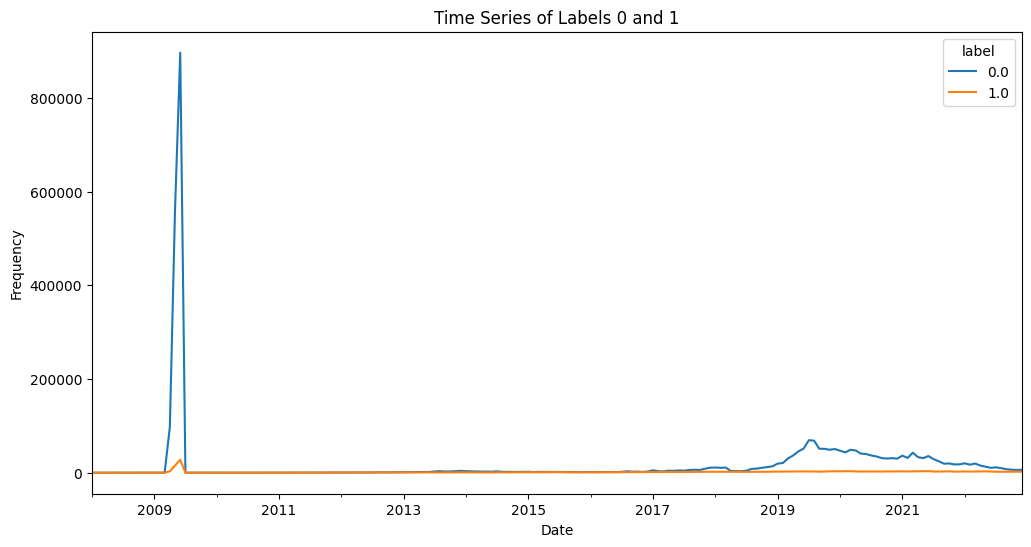

In [18]:
import matplotlib.pyplot as plt

# Filter the dataframe for labels 0 and 1
df_filtered = df[df['label'].isin([0, 1])]

# Group by date and label, then count the occurrences
df_grouped = df_filtered.groupby([df_filtered['date'].dt.to_period('M'), 'label']).size().unstack(fill_value=0)

# Plot the time series
df_grouped.plot(kind='line', figsize=(12, 6))
plt.title('Time Series of Labels 0 and 1')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.show()

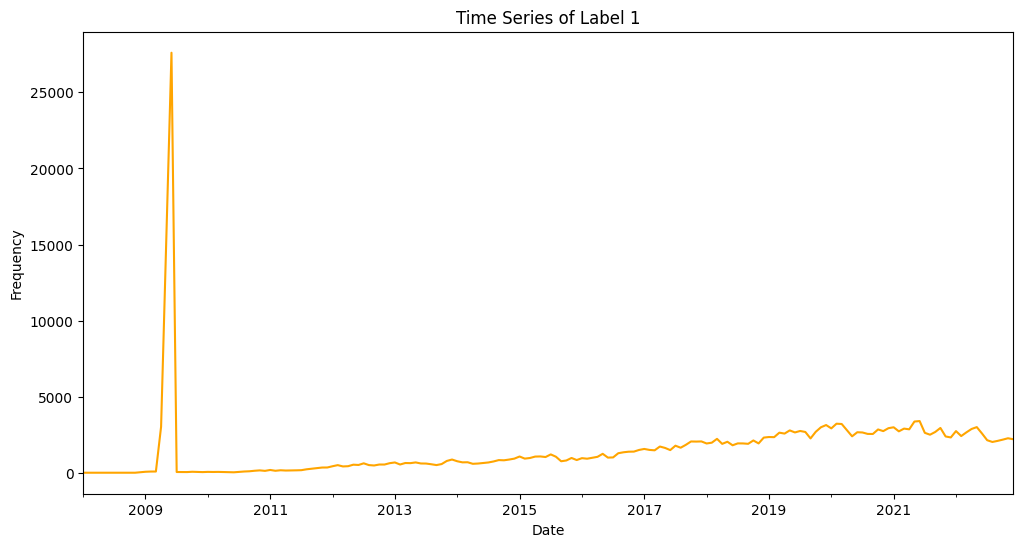

In [20]:
# Plot the time series for label 1
df_grouped[1.0].plot(kind='line', figsize=(12, 6), color='orange')
plt.title('Time Series of Label 1')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.show()

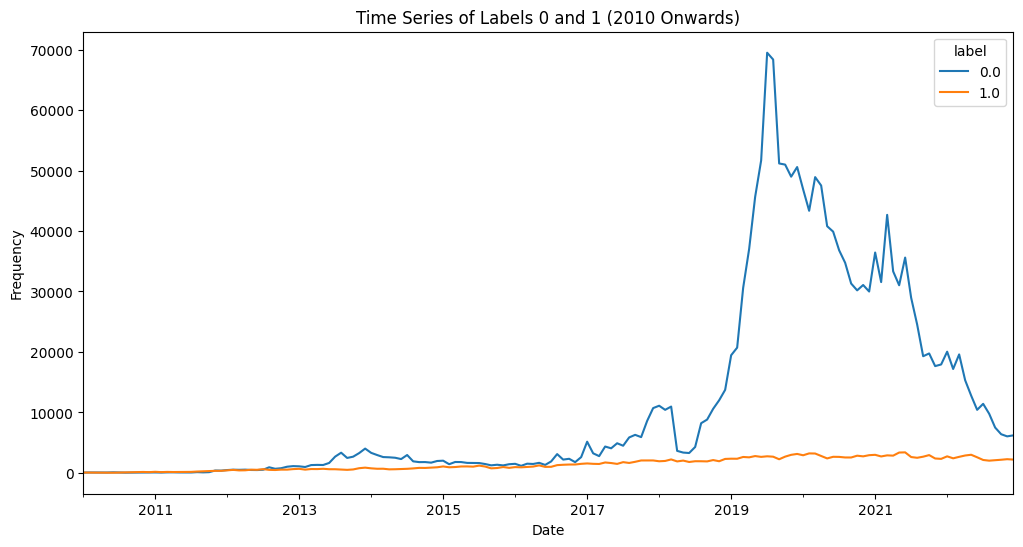

In [21]:
df_grouped_2010_onwards = df_grouped[df_grouped.index >= '2010']
df_grouped_2010_onwards.plot(kind='line', figsize=(12, 6))
plt.title('Time Series of Labels 0 and 1 (2010 Onwards)')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.show()

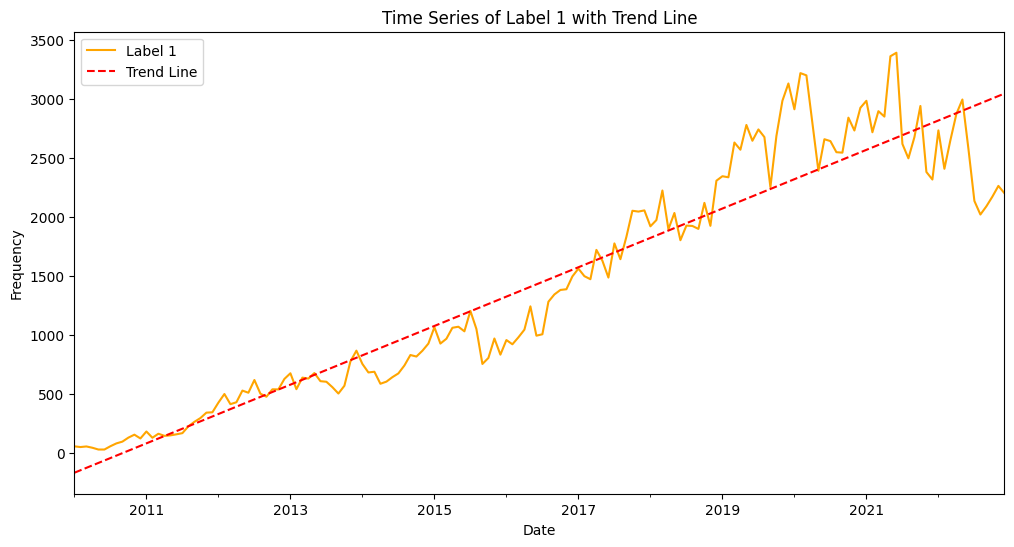

In [ ]:
import numpy as np

# Plot the time series for label 1
ax = df_grouped_2010_onwards[1.0].plot(kind='line', figsize=(12, 6), color='orange', label='Label 1')

# Calculate the trend line
z = np.polyfit(df_grouped_2010_onwards.index.astype(int), df_grouped_2010_onwards[1.0], 1)
p = np.poly1d(z)

# Plot the trend line
plt.plot(df_grouped_2010_onwards.index, p(df_grouped_2010_onwards.index.astype(int)), "r--", label='Trend Line')

plt.title('Time Series of Label 1 with Trend Line')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.legend()
plt.show()